In [155]:
import numpy as np
import matplotlib.pyplot as plt
import os

from reservoirpy.datasets import mackey_glass, lorenz96, henon_map
from utils.dataGenerator import powerlawNoiseGenerator
from utils.dataPlots import plot_timeseries, plot_attractor

from core.models import EchoStateNetwork, SingleNodeDelayESN, TwoNodeDelayESN
from core.pipelines import StandardPipeline, DelayPipeline

from utils.plotting import predictionAnalysis, predictionAnalysisNDim, internalStatesHistogram
from utils.exporting import export_results

In [156]:
timeseries = mackey_glass(15000)
timeseries.shape

(15000, 1)

/Users/sashvqz/Downloads/TFGs/utils/dataPlots.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


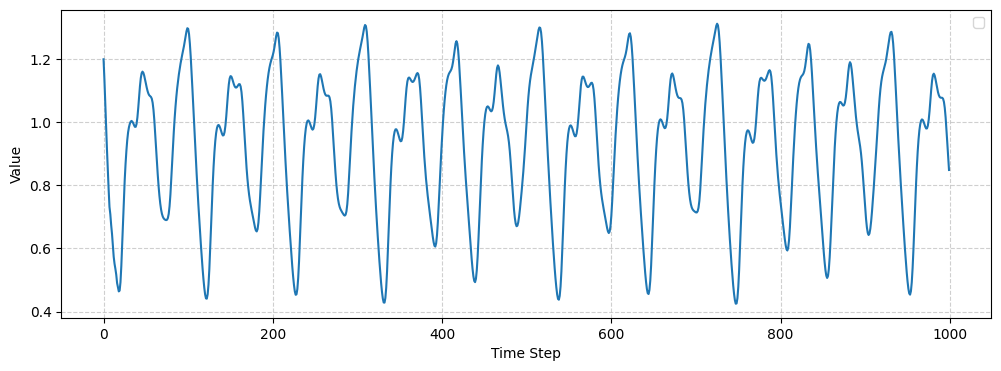

In [157]:
plot_timeseries(timeseries)

In [158]:
params = {
    'inputSize': 1,
    'reservoirSize': 347,
    'outputSize': 1,
    'spectralRadius': 0.93,
    'inputScaling': 0.39,
    'leakingRate': 0.34,
    'sparsity': 0.77,
    'ridgeParam': 0.25,
    'activation': np.tanh,
    'feedback': False,
    'stateNoise': 0.0,
    'randomSeed': 42
}

In [159]:
model = EchoStateNetwork(**params)

In [160]:
pipeline = StandardPipeline(esn_model=model)

In [161]:
predictions, actuals, metrics, internal_states = pipeline.run(
    timeseries,
    trainRatio=0.7,
    predictionHorizon=1,
    washout_train=500,
    washout_pred=0,
)

In [162]:
metrics

{'mse': 3.843919535355115e-05,
 'rmse': np.float64(0.006199935108817765),
 'mae': 0.002676636574992213,
 'nrmse': np.float64(0.006889922383934564)}

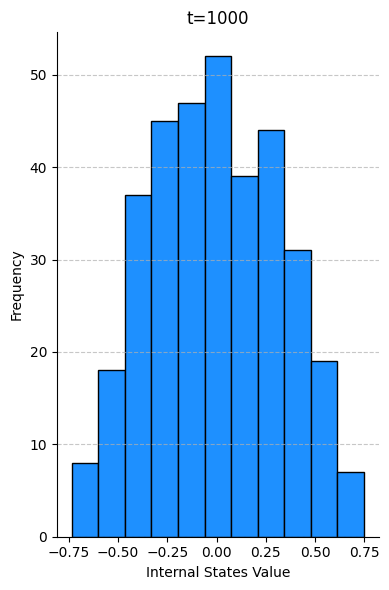

In [163]:
internalStatesHistogram(
    states=internal_states,
    time_step_index=1000,
    reservoir_size=params['reservoirSize'],
)

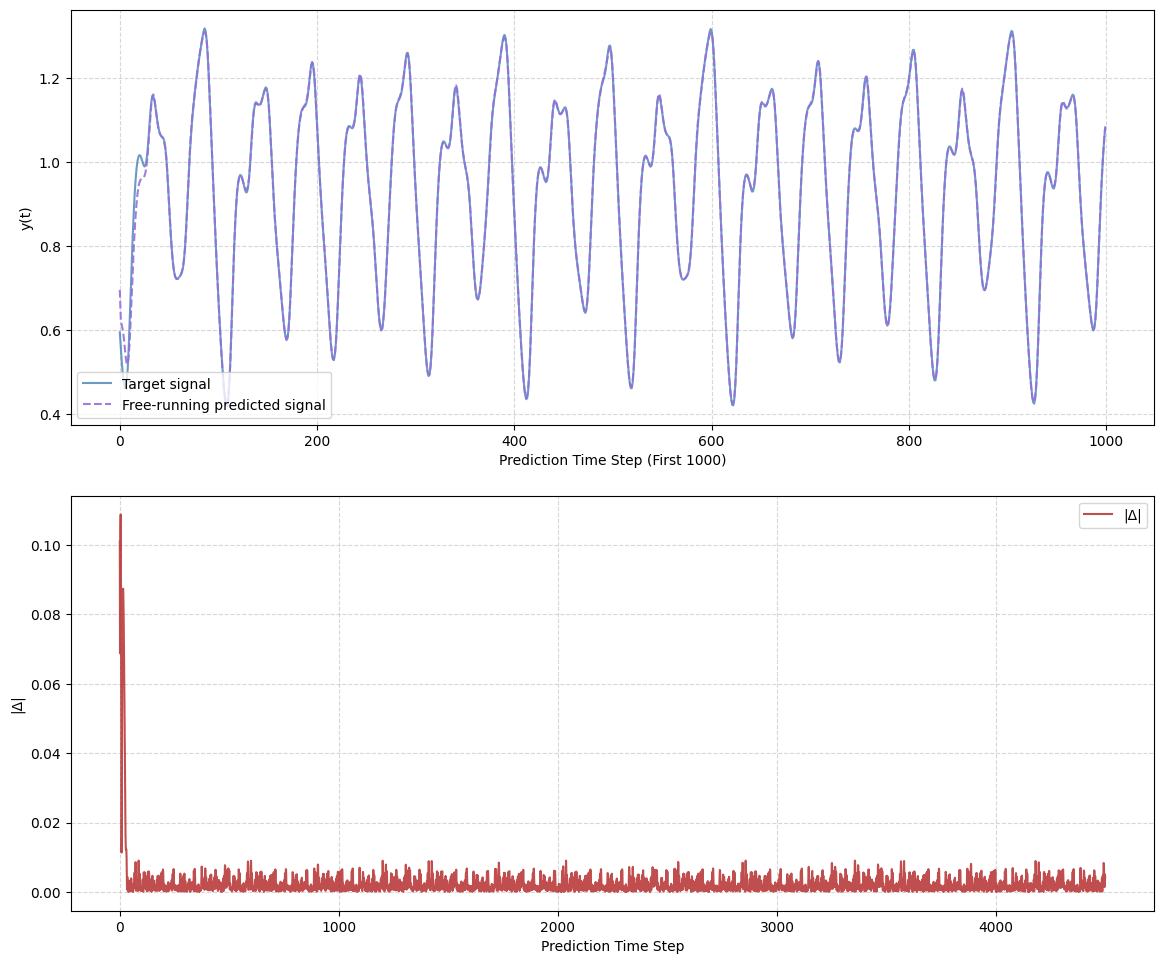

In [164]:
predictionAnalysis(predictions, actuals, zoom_limit=1000)

In [165]:
henonSeries = henon_map(n_timesteps=15000)
henonSeries.shape

(15000, 2)

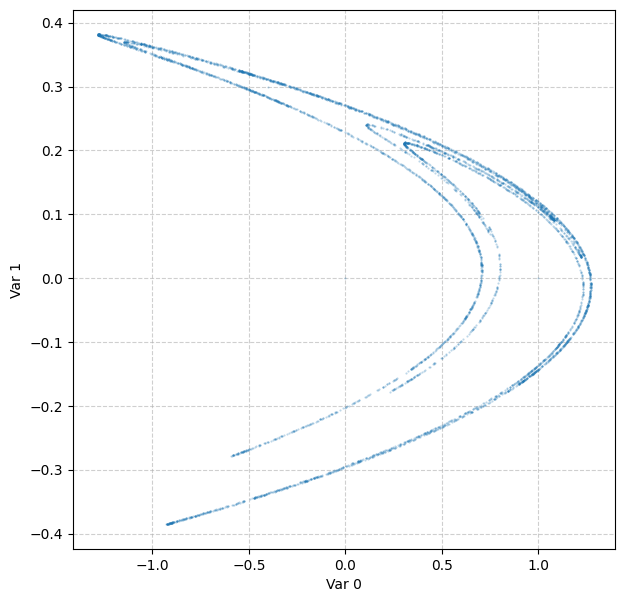

In [166]:
plot_attractor(henonSeries)

In [167]:
paramsHenon = {
    'inputSize': 2,
    'reservoirSize': 800,
    'outputSize': 2,
    'spectralRadius': 0.9,
    'ridgeParam': 1e-8,
    'leakingRate': 0.2,
    'randomSeed': 42
}

In [168]:
modelHenon = EchoStateNetwork(**paramsHenon)

In [169]:
pipelineHenon = StandardPipeline(esn_model=modelHenon)

In [170]:
predictionsHenon, actualsHenon, metricsHenon, internal_statesHenon = pipelineHenon.run(
    henonSeries,
    trainRatio=0.7,
    predictionHorizon=1,
    washout_train=500,
    washout_pred=0,
)

In [171]:
metricsHenon

{'mse': 0.0009588169663304292,
 'rmse': np.float64(0.030964769760655885),
 'mae': 0.0018708642174700412,
 'nrmse': np.float64(0.018629510100402813)}

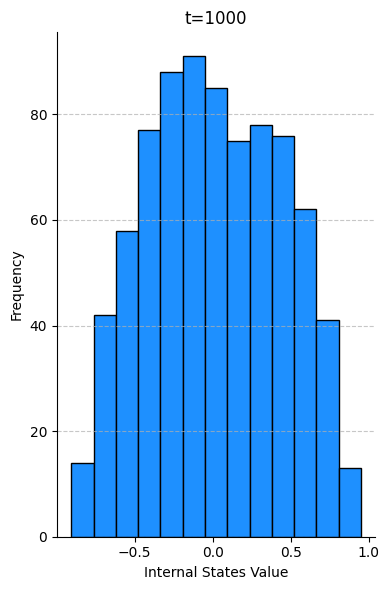

In [172]:
internalStatesHistogram(
    states=internal_statesHenon,
    time_step_index=1000,
    reservoir_size=paramsHenon['reservoirSize'],
)

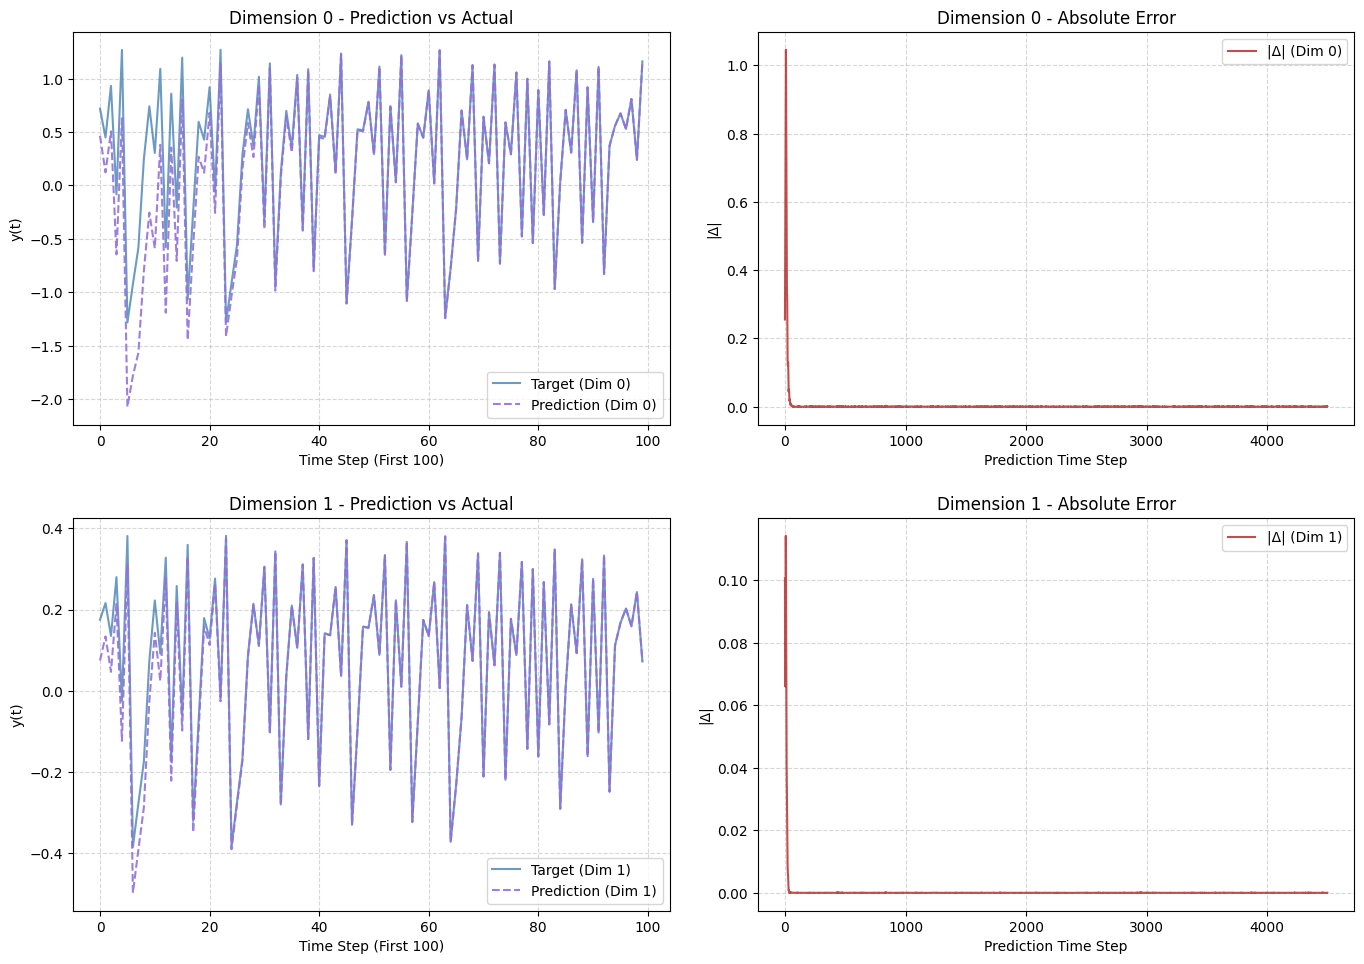

In [173]:
predictionAnalysisNDim(predictionsHenon, actualsHenon, zoom_limit=100)

In [174]:
N_STEPS = 15000
BETA = 1.8
SEED = 42

In [175]:
timeseriesPowerLaw = powerlawNoiseGenerator(N_STEPS, BETA, randomSeed=SEED)
timeseriesPowerLawSim = timeseriesPowerLaw.reshape(-1, 1)
timeseriesPowerLaw.shape

(15000,)

In [176]:
plot_timeseries(timeseriesPowwerLaw)

NameError: name 'timeseriesPowwerLaw' is not defined

In [ ]:
paramsPowerLaw = {
    'inputSize': 1,
    'reservoirSize': 3470,
    'outputSize': 1,
    'spectralRadius': 0.93,
    'inputScaling': 0.39,
    'leakingRate': 0.34,
    'sparsity': 0.77,
    'ridgeParam': 0.25,
    'activation': np.tanh,
    'feedback': False,
    'stateNoise': 0.0,
    'randomSeed': 42
}

In [ ]:
modelPowerLaw = EchoStateNetwork(**paramsPowerLaw)

In [ ]:
pipelinePowerLaw = StandardPipeline(esn_model=modelPowerLaw)

In [ ]:
predictionsPowerLaw, actualsPowerLaw, metricsPowerLaw, internal_statesPowerLaw = pipelinePowerLaw.run(
    timeseriesPowerLawSim,
    trainRatio=0.7,
    predictionHorizon=1,
    washout_train=500,
    washout_pred=0,
)

In [ ]:
metricsPowerLaw

{'mse': 0.0026959453995962375,
 'rmse': np.float64(0.05192249415808371),
 'mae': 0.04122692369041757,
 'nrmse': np.float64(0.016968965643664655)}

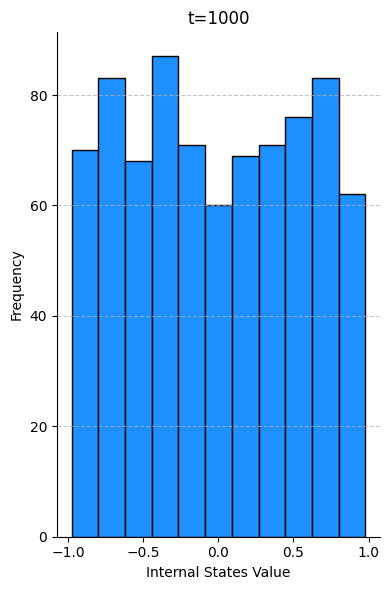

In [ ]:
internalStatesHistogram(
    states=internal_statesPowerLaw,
    time_step_index=1000,
    reservoir_size=paramsPowerLaw['reservoirSize'],
)

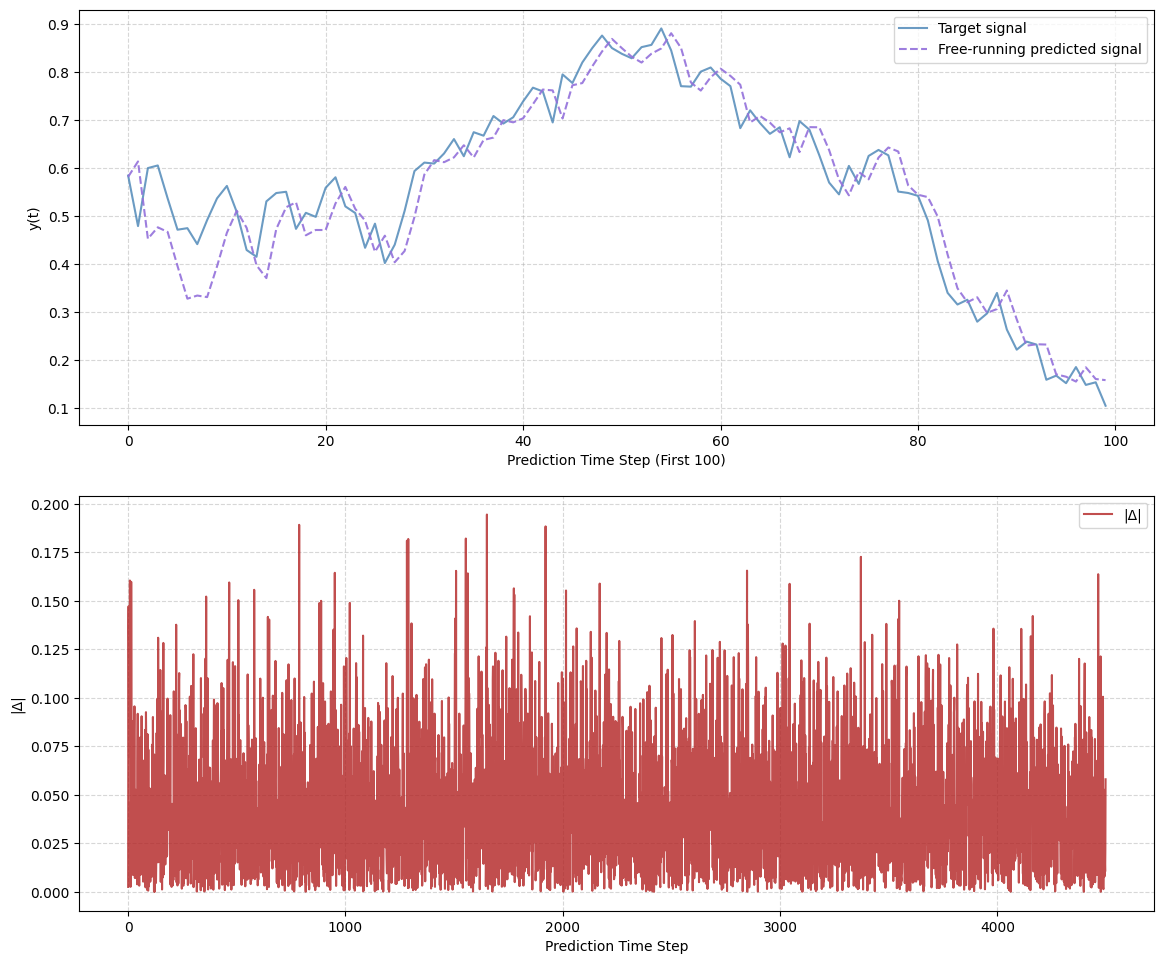

In [ ]:
predictionAnalysis(predictionsPowerLaw, actualsPowerLaw, zoom_limit=100)